# Social Media Analytics

In [1]:
import re
import wordcloud
import tweepy 
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import spacy 
from spacy import displacy

In [2]:
api_key = "n4DVEWDyzaBzwcM3DPHQqOeqK"
api_secret = "uYVn6ZeDGTXOnHyvny1R6ncSZvjisbzQvdwB1z5gzXX7bJEENx"
access_token = "857530568-OJmU4XeRpG8ymQyuJiHvvFxgBO0oQWt2LyPiTrj1"
access_token_secret = "SLKaz3rOEPvNyLZECmyXNj7rhG1NoJZxuwPsD2YJi6QBM"

In [3]:
authenticator = tweepy.OAuthHandler(api_key,api_secret)
authenticator.set_access_token(access_token,access_token_secret)
api = tweepy.API(authenticator)

In [4]:
tweets = api.search(q="Adani",count=70,tweet_mode="extended")

In [5]:
clean_tweets = []
sentiments = []
for tw in tweets:
    tw = tw.full_text
    tw = re.sub("RT","",tw)# removing RT
    tw = re.sub("#","",tw)# removing #
    tw = re.sub("@[a-zA-Z0-9:_]+","",tw)# removing handles
    tw = re.sub("http[a-zA-Z0-9:\/\-\.]+","",tw)# removing URLs
    tw = tw.strip() # removing extra whitespaces
    if len(tw)>10:
        tw = TextBlob(tw)
        print(tw)
        try:
            if tw.detect_language()!='en':
                tw = tw.translate(to='en')
                print(tw)
        except:
            print("not translated")
        clean_tweets.append(tw.raw)
        if tw.sentiment.polarity>+0.1:
            print("Positive")
            sentiments.append("Positive")
        elif tw.sentiment.polarity<-0.1:
            print("Negative")
            sentiments.append("Negative")
        else:
            print("Neutral")
            sentiments.append("Neutral")
        
        print("*********************************************************")

Modiji's fraands r such a privileged lot🤫
Airports 4 Adani
Telecom 4 Ambani TaxExemption 4 Ramdev
Thr debts worth cro…
Positive
*********************************************************
Major MoUs include- Rs 5,000 cr MoU with Adani Group to setup data centres across Karnataka, Rs 2,250 cr MoU with Singapo…
Neutral
*********************************************************
Modi changed rules to allow new entrants with no prior experience to run Airports

Modi went against experts &amp; allowed mono…
Neutral
*********************************************************
"Enugu: 2 soldiers killed as ESN attack location at Adani" - Sun news

Which ESN?
The same one their obligatory Fulani COAS c…
Neutral
*********************************************************
Adani has modi in his pocket
We have gandhiji in our pocket.
Neutral
*********************************************************
ji
You seems to be from very RICH family, probably next to Ambani &amp; Adani's family.
Kindly suggest somethi

not translated
Neutral
*********************************************************
Modiji's fraands r such a privileged lot🤫
Airports 4 Adani
Telecom 4 Ambani TaxExemption 4 Ramdev
Thr debts worth cro…
Positive
*********************************************************
Dear Team

Please Check I Have Made The Payment
Neutral
*********************************************************
Been 1 week since story broke of unknown FPIs owning $6bn shares. They are still unknown. 

No PMLA, no action under undis…
Neutral
*********************************************************
Mumbai Airport to Adani

5 years Tax Exemption to Ramdev

Rafael deal to Reliance 

269% tax on fuel to common people…
Negative
*********************************************************
Modiji's fraands r such a privileged lot🤫
Airports 4 Adani
Telecom 4 Ambani TaxExemption 4 Ramdev
Thr debts worth cro…
Positive
*********************************************************
Apologies for the inconvenience caused to you. This is no

In [6]:
len(sentiments)

65

C:\Users\anshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


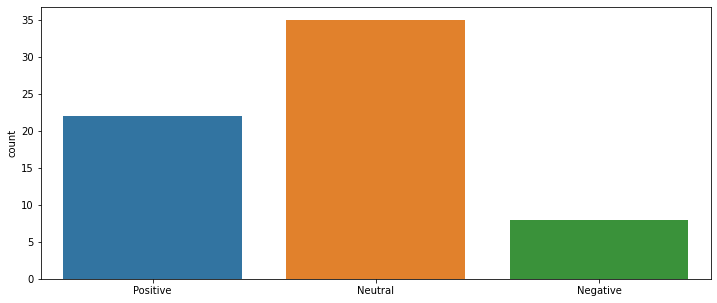

In [7]:
plt.figure(figsize=(12,5))
sns.countplot(sentiments)
plt.show()

In [8]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'tweetdata':clean_tweets,'sentiments':sentiments})
df.head()

,tweetdata,sentiments
0,Modiji's fraands r such a privileged lot🤫\nAir...,Positive
1,"Major MoUs include- Rs 5,000 cr MoU with Adani...",Neutral
2,Modi changed rules to allow new entrants with ...,Neutral
3,"""Enugu: 2 soldiers killed as ESN attack locati...",Neutral
4,Adani has modi in his pocket\nWe have gandhiji...,Neutral


## Wordcloud Analysis

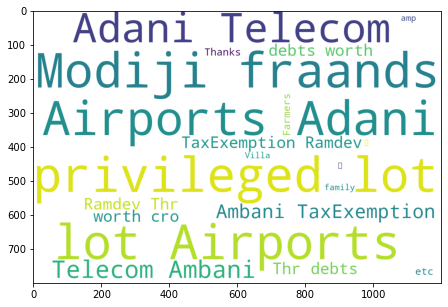

In [9]:
ptweets = df.tweetdata[df.sentiments=='Positive'].tolist()
wd = wordcloud.WordCloud(background_color='white',width=1200,height=800,
                         max_words=20).generate_from_text(" ".join(ptweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

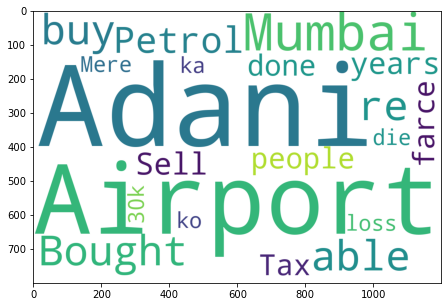

In [10]:
ntweets = df.tweetdata[df.sentiments=='Negative'].tolist()
wd = wordcloud.WordCloud(background_color='white',width=1200,height=800,
                         max_words=20).generate_from_text(" ".join(ntweets))
plt.figure(figsize=(12,5))
plt.imshow(wd)
plt.show()

## NER Analysis

In [14]:
nlp = spacy.load("en_core_web_sm")

In [15]:
for tw in ptweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

C:\Users\anshu\anaconda3\lib\site-packages\spacy\displacy\__init__.py:191: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [16]:
for tw in ntweets:
    doc = nlp(tw)
    displacy.render(doc,style='ent',jupyter=True)

# Working with textblob

In [14]:
data = TextBlob("I like python programming.")
data.detect_language()

'en'

In [15]:
data.translate(to='hi')

TextBlob("मुझे पायथन प्रोग्रामिंग पसंद है।")

In [16]:
data.translate(to='ta')

TextBlob("எனக்கு பைதான் நிரலாக்கத்தை பிடிக்கும்.")

In [17]:
data.translate(to='mr')

TextBlob("मला अजगर प्रोग्रामिंग आवडतो.")

In [18]:
data = TextBlob("I like this movie and loved the climax")
data.sentiment.polarity

0.7

In [19]:
data = TextBlob("I hate this movie and hate the climax")
data.sentiment.polarity

-0.8

In [29]:
data = TextBlob("I hate this movie and love the climax")
data.sentiment.polarity

-0.15000000000000002

## NER Analysis

In [13]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("John bought a watch from Mumbai and started his job at Reliance pvt ltd 2 years ago with Smith and Jessy.")
displacy.render(doc,style='ent',jupyter=True)